In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np


In [13]:
data = pd.read_csv('data.csv')


In [14]:
#data.describe

In [15]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [16]:
# Perform PCA with 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

In [17]:
# Create a DataFrame with the principal components
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Concatenate the principal components with original data (if needed)
result_df = pd.concat([principal_df, data], axis=1)

# Print the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


Explained Variance Ratio: [0.77548101 0.19912267]


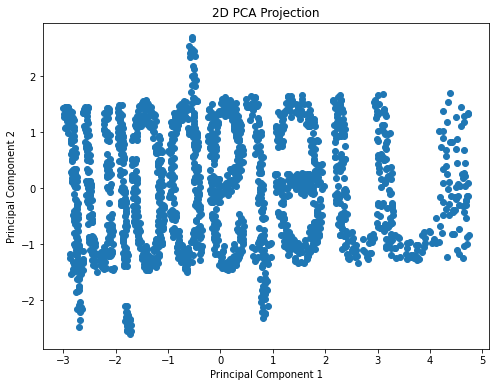

First Principal Component Weights: [-0.49951367 -0.50144677 -0.49776462 -0.49951022 -0.04191842]
Second Principal Component Weights: [-0.03457387 -0.00366049 -0.01097468 -0.03462778  0.99873506]


In [18]:
# Plot the 2D projection
plt.figure(figsize=(8, 6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Projection')
plt.show()

# You can also access the principal components using pca.components_
# For example, the first principal component weights:
print("First Principal Component Weights:", pca.components_[0])

# The second principal component weights:
print("Second Principal Component Weights:", pca.components_[1])

In [19]:

std_dev_pc1 = np.std(principal_components[:, 0])
std_dev_pc2 = np.std(principal_components[:, 1])


std_dev_pc1_rounded = round(std_dev_pc1, 2)
std_dev_pc2_rounded = round(std_dev_pc2, 2)


print("Standard Deviation of PC1:", std_dev_pc1_rounded)
print("Standard Deviation of PC2:", std_dev_pc2_rounded)

Standard Deviation of PC1: 1.97
Standard Deviation of PC2: 1.0


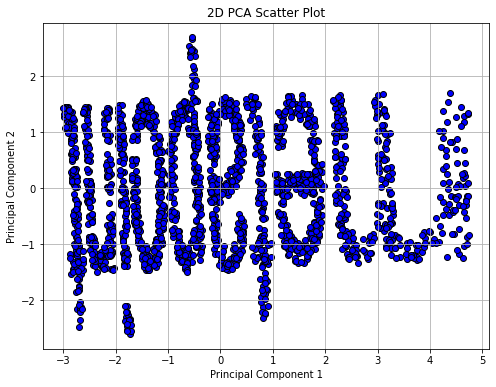

In [20]:
import matplotlib.pyplot as plt

# Assuming you already have the 'principal_components' array from PCA
# principal_components = pca.fit_transform(scaled_data)

# Create a 2D scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='b', marker='o', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Scatter Plot')
plt.grid(True)
plt.show()


In [23]:
data = pd.read_csv('train_data.csv')

In [24]:
columns_with_nan = data.columns[data.isnull().any()].tolist()

# Print the columns with NaN values
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['OUTPUT']


In [35]:
data_cleaned = data.drop(columns=columns_with_nan)

In [41]:
float_columns = data.select_dtypes(include=['float64']).columns.tolist()

# Detect and remove outliers using IQR, and remove rows with NaN values
for column in float_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove rows with outliers and NaN values in the current column
    data = data[(data[column] >= lower_bound) & 
                                  (data[column] <= upper_bound) &
                                  (~data[column].isnull())]

# Now, 'training_data' contains the cleaned DataFrame with rows containing floating-point outliers and NaN values removed


In [43]:
num_rows_remaining = len(data)

print("Number of rows remaining in the dataset:", num_rows_remaining)

Number of rows remaining in the dataset: 816
